In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
df = sns.load_dataset('iris')

In [11]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
77,6.7,3.0,5.0,1.7,versicolor
0,5.1,3.5,1.4,0.2,setosa


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_length', ylabel='petal_width'>

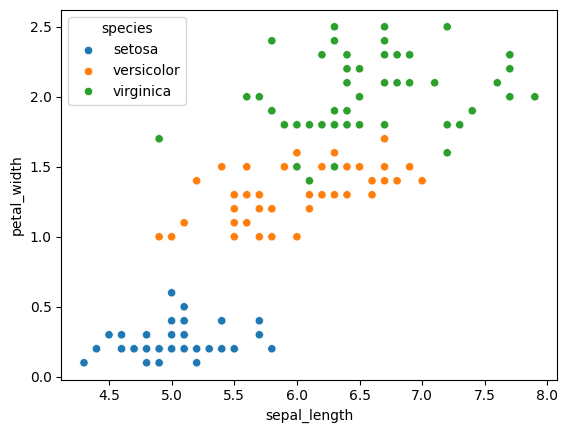

In [14]:
sns.scatterplot(data=df,x='sepal_length', y='petal_width',hue='species')

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [18]:
X_train.sample(3)

,sepal_length,sepal_width,petal_length,petal_width
120,6.9,3.2,5.7,2.3
75,6.6,3.0,4.4,1.4
2,4.7,3.2,1.3,0.2


In [19]:
ss = StandardScaler()

X_train_new = ss.fit_transform(X_train)
X_test_new = ss.transform(X_test)

In [20]:
ss.mean_

array([5.88660714, 3.05178571, 3.79642857, 1.22321429])

In [21]:
le = LabelEncoder()

y_train_new = le.fit_transform(y_train)
y_test_new = le.transform(y_test)

In [22]:
X_train_df = pd.DataFrame(X_train_new, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_new, columns=X_test.columns)

In [23]:
np.round(X_train_df.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,112.00,112.00,112.00,112.00
mean,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.83,-2.42,-1.50,-1.44
25%,-0.91,-0.58,-1.24,-1.19
50%,-0.10,-0.12,0.25,0.10
75%,0.71,0.57,0.78,0.87
max,2.32,3.10,1.73,1.64


In [272]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_new, y_train_new)

KNeighborsClassifier(n_neighbors=3)

In [273]:
y_pred = knn.predict(X_test_new)

In [274]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [275]:
accuracy_score(y_pred, y_test_new)

0.9736842105263158

In [283]:
confusion_matrix(y_test_new, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [285]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Finding correct value of K?

- aim: highest accuary score ..


In [276]:
score = []

for i in range(2,18):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_new, y_train_new)
    y_pred = knn.predict(X_test_new)
    score.append(accuracy_score(y_test_new, y_pred))

In [277]:
print(score)

[0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


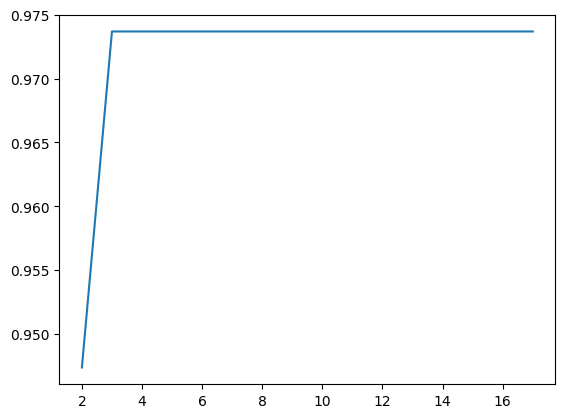

In [ ]:
plt.plot(range(2,18),score)

## Decision Boundary in KNN:

- Voronoi diagram

#### Steps to plot Decision Boundary for Knn(Assuming 2 input cols)

1. Train the classifier on the training set.

2. Create a uniform grid(with the help of Numpy Meshgrids) of points that densely cover the region of input space containing the training set.

3. Classify each point on the grid. Store the results in an array A, where Aij contains the predicted class for the point at row i, column j on the grid.

4. Plot the array as an image, where each pixel corresponds to a grid point and its color represents the predicted class. The decision boundary can be seen as contours where the image changes color.

5. Finally print out the training data with their respective color on the same contour

In [26]:
df = sns.load_dataset('iris')

In [41]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
97,6.2,2.9,4.3,1.3,versicolor
133,6.3,2.8,5.1,1.5,virginica
108,6.7,2.5,5.8,1.8,virginica


In [42]:
X = df.iloc[:,[0,3]]
y = df.iloc[:,-1]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [44]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [45]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [46]:
X_train

array([[ 0.01543995,  0.35579762],
       [-0.09984503, -0.02984109],
       [ 1.05300481,  1.12707506],
       [-1.36797986, -1.31530348],
       [ 1.1682898 ,  1.38416753],
       [-1.0221249 , -0.80111852],
       [-0.56098497, -1.31530348],
       [-1.0221249 , -0.28693357],
       [ 0.70714986,  0.74143634],
       [ 0.93771983,  1.64126001],
       [ 0.13072494,  0.35579762],
       [ 0.93771983,  0.74143634],
       [-0.330415  , -0.15838733],
       [ 2.09056967,  1.38416753],
       [ 0.47657989,  0.48434386],
       [-0.44569998, -0.15838733],
       [ 0.47657989,  0.74143634],
       [ 0.47657989,  0.35579762],
       [-1.13740989,  0.6128901 ],
       [ 0.47657989,  0.86998258],
       [ 1.28357478,  0.22725139],
       [ 0.70714986,  0.99852882],
       [ 0.13072494,  0.48434386],
       [-1.25269487, -1.31530348],
       [-0.09984503,  0.86998258],
       [-0.330415  ,  0.09870515],
       [-0.330415  ,  0.09870515],
       [-0.44569998,  0.09870515],
       [ 0.24600992,

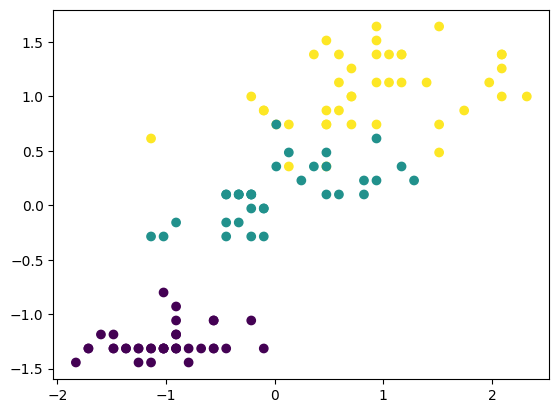

In [47]:
plt.scatter(x = X_train[:,0],y = X_train[:,1], c = y_train)

Step 1: Train the Classifier on training data.

In [48]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Step 2: Creating Meshgrid

In [49]:
a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)

In [53]:
XX.shape

(509, 616)

Step 3: Classifiying every point on the meshgrid

In [ ]:
XX.ravel()  # flatten the array

array([-2.82911979, -2.81911979, -2.80911979, ...,  3.30088021,
        3.31088021,  3.32088021])

In [ ]:
np.array([XX.ravel(),YY.ravel()]).shape # but the model wants first rows (data) and second columns -> So, Transpose the metrix

(2, 313544)

In [ ]:
input_array=np.array([XX.ravel(),YY.ravel()]).T # Transposed metrix

labels=knn.predict(input_array)

In [66]:
509*616

313544

In [56]:
labels.shape

(313544,)

In [68]:
labels.reshape(XX.shape)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

Step 4: Plotting the array as an image

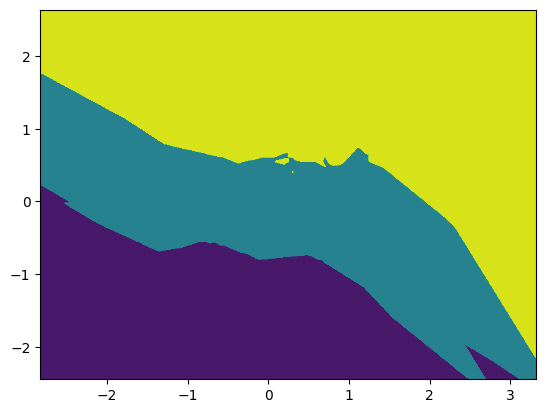

In [70]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

Step 5: Plotting all the training data on the plot

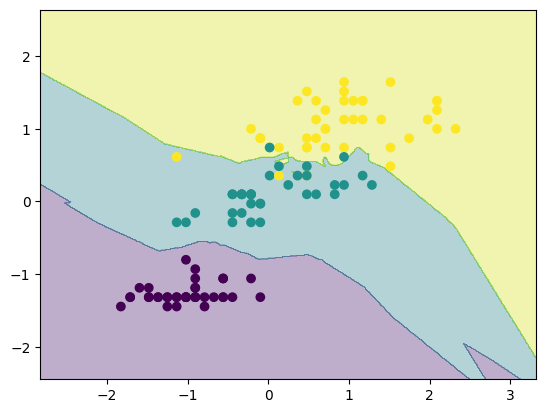

In [62]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.35)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)